In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [49]:
class Quaternion:
    def __init__(self, array=[1.0, 0.0, 0.0, 0.0]):
        self.q = np.array(array)
        
    def __repr__(self):
        return '{:.3f}w {:.3f}i {:.3f}j {:.3f}k'.format(self.q[0], self.q[1], self.q[2], self.q[3])
    
    def __copy__(self):
        return Quaternion(self.q)
    
    def __neg__(self):
        return Quaternion(-1.0 * self.q)
    
    def __mul__(self, rhs):
        ''' Quaternion multiplication can be simplified to a couple forms, they're all the same mathematically. '''
        # the right-hand-side is a number (as opposed to a quaternion)
        if isinstance(rhs, int) or isinstance(rhs, float):
            return Quaternion(self.q * rhs)
        else:
            l0, l1, l2, l3 = self.q
            r0, r1, r2, r3 = rhs.q
            return Quaternion([l0 * r0 - l1 * r1 - l2 * r2 - l3 * r3,
                               l0 * r1 + l1 * r0 + l2 * r3 - l3 * r2,
                               l0 * r2 - l1 * r3 + l2 * r0 + l3 * r1,
                               l0 * r3 + l1 * r2 - l2 * r1 + l3 * r0])
    
    def __rmul__(self, lhs):
        # the left-hand-side is a scalar, otherwise '__mul__' would be called
        return Quaternion(lhs * self.q)
    
    def __truediv__(self, rhs):
        if isinstance(rhs, int) or isinstance(rhs, float):
            return Quaternion(self.q / rhs)
        else:
            return self * rhs.inv()
    
    def conj(self):
        return Quaternion(np.array([1.0, -1.0, -1.0, -1.0]) * self.q)
    
    def inv(self):
        return Quaternion(self.conj().q / self.q.dot(self.q))
    
    def norm(self):
        return np.linalg.norm(self.q)
    
    def normalize(self, inplace=False):
        if inplace:
            self.q = (self / self.norm()).q
            return self
        else:
            return self / self.norm()
        
    def rotate(self, vect):
        vect = np.array(vect)
        if vect.shape != (3,):
            raise TypeError("Input needs to be a 1D array with 3 elements")
        p = Quaternion([0, vect[0], vect[1], vect[2]])
        p_prime = self * p * self.conj()
        return p_prime.q[1::]

In [3]:
def axis_angle_to_quat(theta, axis):
    i, j, k = np.sin(theta/2) * np.array(axis)
    return Quaternion([np.cos(theta/2), i, j, k])

In [4]:
def quat_to_axis_angle(q):
    theta = 2 * np.arctan2(np.linalg.norm(q.q[1:4]), q.q[0])
    axis = q.q[1:4] / np.linalg.norm(q.q[1:4])
    return theta, axis

In [5]:
q = axis_angle_to_quat(np.pi/2, [1, 0, 0])
print(q)

0.707w 0.707i 0.000j 0.000k


In [6]:
theta, vect = quat_to_axis_angle(q)
print('theta: {:.3f}    axis: {}'.format(theta, vect))

theta: 1.571    axis: [1. 0. 0.]


## Quaternion multplication
A quaternion multiplication of $q_2\cdot q_1$ is the equivalent of rotation $q_1$ followed by the rotation $q_2$. Quaternion multiplication is non-commutative with one exception. Two [quaternions commute](https://en.wikipedia.org/wiki/Quaternion#Commutative_subrings) only if they lie in the same complex subplane, that is, if their vector parts are co-linear. Additionally, the product $aq = qa$ for every quaternion $q$ and every real quaternion $a$. A real quaternion is one that has all complex basis elements $i$, $j$, and $k$ equal to zero.

In [7]:
q1 = Quaternion([3, 1, -2, 1])
q2 = Quaternion([2, -1, 2, 3])
q3 = Quaternion([3, -1, 2, 3])
q4 = Quaternion([3, 0, 0, 0])

In [8]:
q1 * q2

8.000w -9.000i -2.000j 11.000k

In [9]:
q1 * 2  # __mul__ is called on 'q1'

6.000w 2.000i -4.000j 2.000k

In [10]:
2 * q1  # __rmul__ is called on 'q1'

6.000w 2.000i -4.000j 2.000k

In [11]:
q2 * q3

-8.000w -5.000i 10.000j 15.000k

In [12]:
q3 * q2

-8.000w -5.000i 10.000j 15.000k

In [13]:
q3 * q4

9.000w -3.000i 6.000j 9.000k

In [14]:
q4 * q3

9.000w -3.000i 6.000j 9.000k

## Quaternion Complex Conjugate
The [complex conjuage](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm) of $q$ is denoted as $q^*$, is defined as 


$$q^* =q_0 + q_1\mathbf{i} + q_2\mathbf{j} + q_3\mathbf{k}$$


From the definintion we immediately have the property


$$(q^*)^* = q$$

In [15]:
(q1.conj()).conj()

3.000w 1.000i -2.000j 1.000k

In [16]:
q1

3.000w 1.000i -2.000j 1.000k

As well as the property


$$q^*q = qq^*$$

Additionally, if $\lVert q \rVert = 1$

$$q^*q = qq^*=1 + 0\mathbf{i} + 0\mathbf{j} + 0\mathbf{k}$$

In [17]:
q1

3.000w 1.000i -2.000j 1.000k

In [18]:
q1.conj()*q1

15.000w 0.000i 0.000j 0.000k

In [19]:
q1*q1.conj()

15.000w 0.000i 0.000j 0.000k

and given two quaternions $p$ and $q$, we can also verify that


$$(pq)^* = q^*p^*$$

In [20]:
(q1*q2).conj()

8.000w 9.000i 2.000j -11.000k

In [21]:
q2.conj() * q1.conj()

8.000w 9.000i 2.000j -11.000k

## Quaternion Norm
The length, or [norm](https://en.wikipedia.org/wiki/Quaternion#Conjugation,_the_norm,_and_reciprocal), of a quaternion is defined as the [Euclidian norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm) of its components


$$\lVert q \rVert = \sqrt{qq^*}= \sqrt{q^*q} = \sqrt{q_0^2 + q_1^2 + q_2^2 + q_3^2}$$


note that this is always a **non-negative real number** (and not a quaternion).

In [22]:
q1.norm()

3.872983346207417

In [23]:
np.sqrt((q1*q1.conj()).q[0])

3.872983346207417

In [24]:
np.sqrt(q1.q.dot(q1.q))

3.872983346207417

## Inverse of a Quaternion
The inverse (reciprical) of a quaternion $q$ is essentially the normalized conjugate of the quaternion. If the quaternion is already normalized (i.e. $\lVert q \rVert = 1$) the inverse is identical to the conjugate. The inverse is defined as

$$ q^{-1}=\frac{q^*}{\rVert q \lVert^2}$$


As one would expect that the inverse of a quaternion left or right multiplied by itself will yield a unit quaternion


$$qq^{-1} = q^{-1}q = \frac{qq^*}{\lVert q \rVert^2} = \frac{\lVert q \rVert^2}{\lVert q \rVert^2} = 1 + 0\mathbf{i} + 0\mathbf{j} + 0\mathbf{k}$$

In [25]:
q1 * q1.inv()

1.000w 0.000i -0.000j 0.000k

In [26]:
q1.inv() * q1

1.000w 0.000i -0.000j 0.000k

In [27]:
(q1.conj() / (q1.norm()**2)) * q1

1.000w 0.000i -0.000j 0.000k

In [28]:
q_tmp = q2.__copy__()
q_tmp.normalize(inplace=False)

0.471w -0.236i 0.471j 0.707k

In [29]:
q_tmp

2.000w -1.000i 2.000j 3.000k

In [30]:
q_tmp.normalize(inplace=True)

0.471w -0.236i 0.471j 0.707k

In [31]:
q_tmp

0.471w -0.236i 0.471j 0.707k

For a unit quaterion where $\lVert q \rVert = 1$, the conjugate of the quaternion $q$ is the same as the inverse of the quaternion
$$q^* = q^{-1}$$

In [32]:
(q1.normalize()).conj()

0.775w -0.258i 0.516j -0.258k

In [33]:
(q1.normalize()).inv()

0.775w -0.258i 0.516j -0.258k

## Quaternion Rotations
The [quaternion rotation](https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation#Using_quaternion_as_rotations) of vector $p$ of the form $[0, x, y, z]$ by quaterion $q$, $p$ rotated by $q$ is
$$p^{\prime} = q p q^*$$

Assume two rotations $q_0$ followed by $q_1$
$$ \begin{align}
p^{\prime} &= q_0 \,p \,q_0^* \\
p^{\prime\prime} &= q_1 \,p \,q_1^* \\
p^{\prime\,\prime} &= q_1 \,(q_0 \,p \,q_0^*) \,q_1^* \\
p^{\prime\,\prime} &= (q_1 \,q_0) \,p \,(q_0^* \,q_1^*) \\
p^{\prime\,\prime} &= (q_1 \,q_0) \,p \,(q_1 \,q_0)^*
\end{align} $$

In [34]:
q2

2.000w -1.000i 2.000j 3.000k

In [35]:
q1.conj() * q2.conj()

8.000w -7.000i -6.000j -11.000k

In [36]:
(q2*q1).conj()

8.000w -7.000i -6.000j -11.000k

In [56]:
qx = axis_angle_to_quat(np.pi/2, [1, 0, 0])  # rotate 90 degrees about the x-axis
qy = axis_angle_to_quat(np.pi/2, [0, 1, 0])  # rotate 90 degrees about the y-axis
qz = axis_angle_to_quat(np.pi/2, [0, 0, 1])  # rotate 90 degrees about the z-axis
p = Quaternion([0, 1, 0, 0])
p_prime = qx*p*qx.conj()
p_prime_prime = qz*qx*p*qx.conj()*qz.conj()

<IPython.core.display.Javascript object>


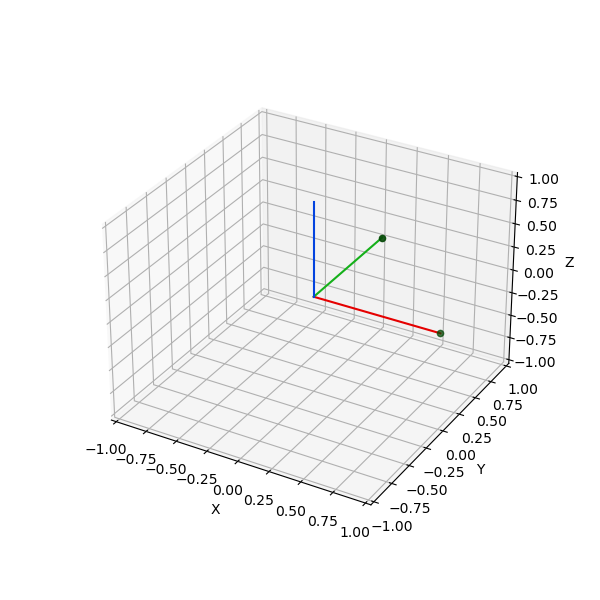

Text(0.5, 0, 'Z')

In [61]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(p.q[1], p.q[2], p.q[3], color='xkcd:darkgreen', alpha=0.3)
ax.scatter(p_prime.q[1], p_prime.q[2], p_prime.q[3], color='xkcd:darkgreen', alpha=0.6)
ax.scatter(p_prime_prime.q[1], p_prime_prime.q[2], p_prime_prime.q[3], color='xkcd:darkgreen', alpha=0.9)


ax.plot([0, 1], [0, 0], [0, 0], color='xkcd:red')
ax.plot([0, 0], [0, 1], [0, 0], color='xkcd:green')
ax.plot([0, 0], [0, 0], [0, 1], color='xkcd:blue')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [39]:
qx = axis_angle_to_quat(np.pi/2, [1, 0, 0])  # rotate 90 degrees about the x-axis
qy = axis_angle_to_quat(np.pi/2, [0, 1, 0])  # rotate 90 degrees about the z-axis
qz = axis_angle_to_quat(np.pi/2, [0, 0, 1])  # rotate 90 degrees about the z-axis
p = Quaternion([0, 1, 0, 0])
p_prime = qz*p*qz.conj()
p_prime_prime = qx*qz*p*qz.conj()*qx.conj()

<IPython.core.display.Javascript object>


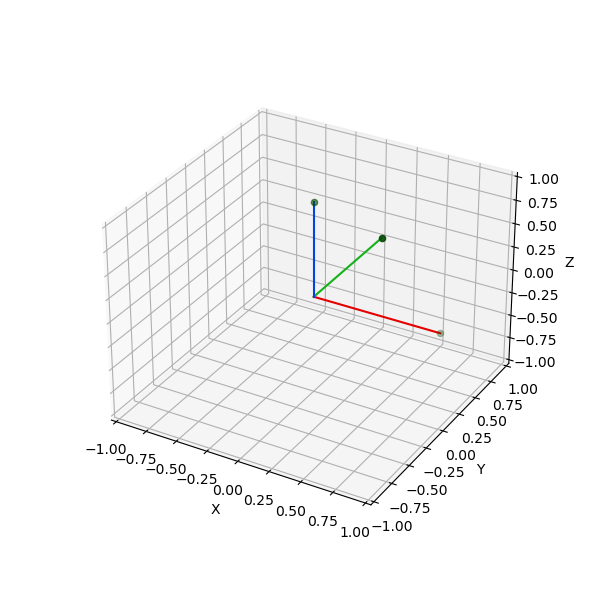

Text(0.5, 0, 'Z')

In [46]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(p.q[1], p.q[2], p.q[3], color='xkcd:darkgreen', alpha=0.3)
ax.scatter(p_prime.q[1], p_prime.q[2], p_prime.q[3], color='xkcd:darkgreen', alpha=0.6)
ax.scatter(p_prime_prime.q[1], p_prime_prime.q[2], p_prime_prime.q[3], color='xkcd:darkgreen', alpha=0.9)


ax.plot([0, 1], [0, 0], [0, 0], color='xkcd:red')
ax.plot([0, 0], [0, 1], [0, 0], color='xkcd:green')
ax.plot([0, 0], [0, 0], [0, 1], color='xkcd:blue')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [41]:
qx = axis_angle_to_quat(np.pi/2, [1, 0, 0])  # rotate 90 degrees about the x-axis
qy = axis_angle_to_quat(np.pi/2, [0, 1, 0])  # rotate 90 degrees about the z-axis
qz = axis_angle_to_quat(np.pi/2, [0, 0, 1])  # rotate 90 degrees about the z-axis
p = Quaternion([0, 1, 0, 0])
p_prime = qy.conj()*p*qy
p_prime_prime = qx.conj()*qy.conj()*p*qy*qx

<IPython.core.display.Javascript object>


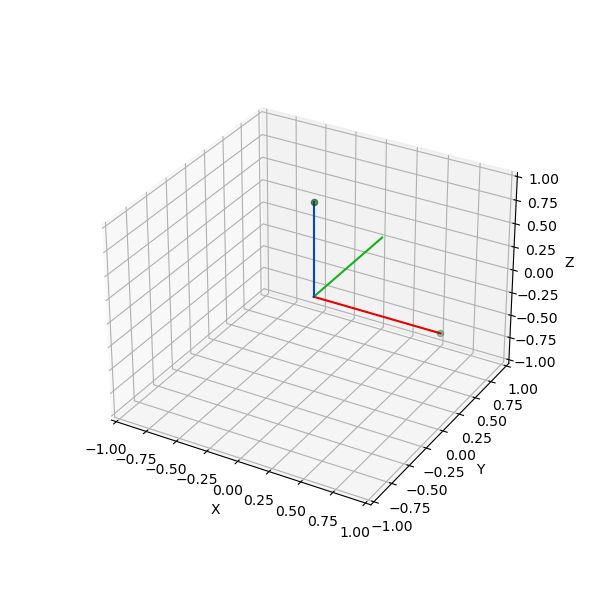

Text(0.5, 0, 'Z')

In [45]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(p.q[1], p.q[2], p.q[3], color='xkcd:darkgreen', alpha=0.3)
ax.scatter(p_prime.q[1], p_prime.q[2], p_prime.q[3], color='xkcd:darkgreen', alpha=0.6)
# ax.scatter(p_prime_prime.q[1], p_prime_prime.q[2], p_prime_prime.q[3], color='xkcd:darkgreen', alpha=0.9)


ax.plot([0, 1], [0, 0], [0, 0], color='xkcd:red')
ax.plot([0, 0], [0, 1], [0, 0], color='xkcd:green')
ax.plot([0, 0], [0, 0], [0, 1], color='xkcd:blue')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [43]:
qx = axis_angle_to_quat(-np.pi/2, [1, 0, 0])  # rotate 90 degrees about the x-axis
qy = axis_angle_to_quat(-np.pi/2, [0, 1, 0])  # rotate 90 degrees about the z-axis
qz = axis_angle_to_quat(-np.pi/2, [0, 0, 1])  # rotate 90 degrees about the z-axis
p = Quaternion([0, 1, 0, 0])
p_prime = qy*p*qy.conj()
p_prime_prime = qx*qy*p*qy.conj()*qx.conj()

<IPython.core.display.Javascript object>


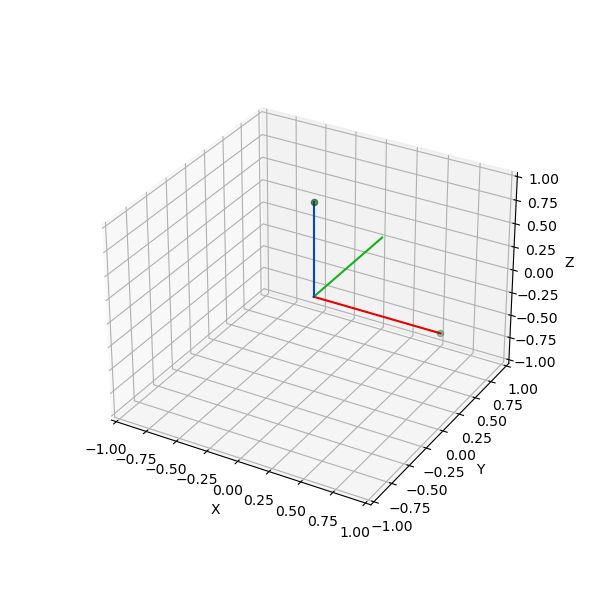

Text(0.5, 0, 'Z')

In [47]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(p.q[1], p.q[2], p.q[3], color='xkcd:darkgreen', alpha=0.3)
ax.scatter(p_prime.q[1], p_prime.q[2], p_prime.q[3], color='xkcd:darkgreen', alpha=0.6)
# ax.scatter(p_prime_prime.q[1], p_prime_prime.q[2], p_prime_prime.q[3], color='xkcd:darkgreen', alpha=0.9)


ax.plot([0, 1], [0, 0], [0, 0], color='xkcd:red')
ax.plot([0, 0], [0, 1], [0, 0], color='xkcd:green')
ax.plot([0, 0], [0, 0], [0, 1], color='xkcd:blue')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## References
1. [https://en.wikipedia.org/wiki/Quaternion](https://en.wikipedia.org/wiki/Quaternion)
2. [http://graphics.stanford.edu/courses/cs348a-17-winter/Papers/quaternion.pdf](http://graphics.stanford.edu/courses/cs348a-17-winter/Papers/quaternion.pdf)
3. [https://www.math.brown.edu/~res/MFS/handout2.pdf](https://www.math.brown.edu/~res/MFS/handout2.pdf)
4. [http://www.cs.cmu.edu/afs/cs/academic/class/16741-s07/www/lectures/Lecture8.pdf](http://www.cs.cmu.edu/afs/cs/academic/class/16741-s07/www/lectures/Lecture8.pdf)
5. [https://mil.ufl.edu/nechyba/www/__eel6667.f2003/course_materials/t3.quaternions/quaternion_slides.pdf](https://mil.ufl.edu/nechyba/www/__eel6667.f2003/course_materials/t3.quaternions/quaternion_slides.pdf)